<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [1]:
import pandas as pd
import numpy as np

# loading the training and test dataset
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


<h3>Q.0. Write code to display the count of null values in each column<h3>

In [2]:
# Command:
credit_train.isna().sum()

# One sentance summary:
# It appears that we don't have any NaN values in our dataset; every cell has a value.

Class                             0
Duration                          0
Amount                            0
InstallmentRatePercentage         0
ResidenceDuration                 0
Age                               0
NumberExistingCredits             0
NumberPeopleMaintenance           0
Telephone                         0
ForeignWorker                     0
CheckingAccountStatus.lt.0        0
CheckingAccountStatus.0.to.200    0
CheckingAccountStatus.gt.200      0
CreditHistory.ThisBank.AllPaid    0
CreditHistory.PaidDuly            0
CreditHistory.Delay               0
CreditHistory.Critical            0
dtype: int64

<h3>Q.1. How does the distribution of credit amount look like? (Use a histogram plot to answer this question)</h3>

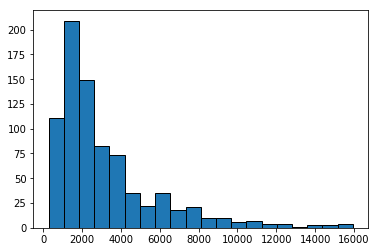

In [3]:
# Put the command (or commands) here that would give an answer to the above question.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#TODO
plt.hist(credit_train['Amount'], edgecolor='black', bins=20)
plt.show()

<h3>Q.2. Can you generate a plot that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

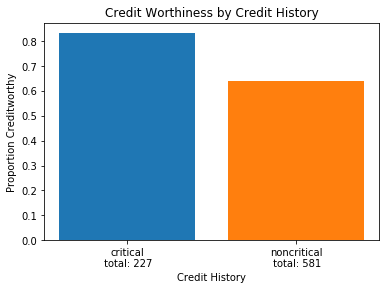

In [4]:
# Command:
noncritical = credit_train[credit_train['CreditHistory.Critical'] == 0]['Class']
critical = credit_train[credit_train['CreditHistory.Critical'] == 1]['Class']

noncritical_proportion_good = (noncritical == 'Good').sum() / len(noncritical)
critical_proportion_good = (critical == 'Good').sum() / len(critical)

plt.bar(f'critical\n total: {len(critical)}', critical_proportion_good)
plt.bar(f'noncritical\n total: {len(noncritical)}', noncritical_proportion_good)
plt.xlabel('Credit History')
plt.ylabel('Proportion Creditworthy')
plt.title('Credit Worthiness by Credit History')

plt.show()

# One sentence summary:
# Oddly, a person with "critical" credit history is, in this data, more likely to have "good" creditworthiness.

<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [5]:
credit_train['Class'] = credit_train['Class'].replace('Bad', 0).replace('Good', 1)
credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,1,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,0,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,1,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,1,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,1,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


<h3>Q.4. Generate a logistic regression model that uses the one predictor CreditHistory.Critical. Provide a summary of the model. </h3>

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs')
X_train = np.array(credit_train['CreditHistory.Critical']).reshape(-1, 1)
y_train = np.array(credit_train["Class"])
clf.fit(X_train, y_train)
print(f'Coefficient: {clf.coef_}')
print(f'Intercept: {clf.intercept_}')

Coefficient: [[0.9820343]]
Intercept: [0.59140229]


<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

In [13]:
from sklearn.metrics import confusion_matrix

X_test = np.array(credit_test['CreditHistory.Critical']).reshape(-1, 1)
y_pred = clf.predict(X_test)
y_true = credit_test['Class'].replace('Good', 1).replace('Bad', 0)
confusion_matrix(y_true, y_pred)

array([[  0,  54],
       [  0, 138]])

<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [14]:
# Command that outputs acccuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.71875

<h3>Q.7. Generate the ROC curve.</h3>

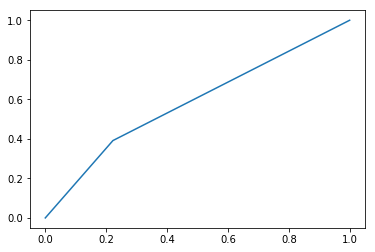

In [27]:
from sklearn.metrics import roc_curve

y_scores = clf.predict_proba(X_test)[:, 1] # take only the positive rates
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
plt.plot(fpr, tpr)

<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

In [28]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_scores)

0.5845410628019323

<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
print(f'Coefficient: {LDA.coef_}')
print(f'Intercept: {LDA.intercept_}')

Coefficient: [[0.93008353]]
Intercept: [0.59794154]


<h3>Q.10. What is the accuracy of the new model?</h3>

In [32]:
accuracy_score(y_true, LDA.predict(X_test))

0.71875

Note that since the model always predicts the positive class, the accuracy score is simply the proportion of true positives in the test set. 

In [43]:
y_true.sum() / len(y_true)

0.71875

<h3>Q.11. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

My prior experience is using classification with texts, in which a fitted model might have thousands of features, which are usually numeric. The constraint in this Notebook of predicting a binary output (good/bad credit worthiness) given a single binary input (critical/noncritical credit history) therefore confused me at first, because of how simple the model is. But it makes sense when you think about it: our model is just predicting the probabilities that we calculated directly in question 2 (see below).

However, this toy model would be very impractical for any real application: by default, it will always assign the positive class! In our training data, the probability that somebody has good credit is greater than 50%, regardless of whether or not they have critical creditworthiness. In a real application, of course, one would want to leverage all the training data, rather than just one feature. With more input features, the model could base its probability estimates on more complicated relationships.

In [34]:
# The model only predicts two possible probabilities: ~64% if creditcritical = 0, ~82% if it = 1. 
np.unique(y_scores)

array([0.64368683, 0.82827297])